# Reading tabular data

Tabular data can be read into a Pandas data frame in a number of ways.

* Read from a csv file
* Read from an excel spreadsheet
* Read from a SQL database
* Read just the tabular part of a spatial file by setting ignore_geometry parameter to True
* Read tables from a website
* Many other formats

Lets begin as usual with the matplotlib inline directive, importing GeoPandas, and also importing pandas

In [24]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

Now lets read a csv file using the pandas read_csv method

In [25]:
BAEA_sources = pd.read_csv("data/BAEA_sources.csv")

In [26]:
BAEA_sources

,code,source
0,1,Colorado Fish Wildlife and Parks
1,2,US Fish and Wildlife Service
2,3,ABC Environmental
3,4,123 Environmental


Lets try another

In [27]:
BAEA_surveys = pd.read_csv("data/BAEA_surveys.csv")
BAEA_surveys.head(6)

,id,nest,surveyor,date,result
0,6.0,52,Dan Smith,2015-07-11,ACTIVE NEST
1,8.0,54,Mike Miller,2015-05-08,ACTIVE NEST
2,9.0,25,Mike Miller,2015-05-13,INACTIVE NEST
3,10.0,65,Mike Miller,2015-08-21,INACTIVE NEST
4,11.0,33,Mike Miller,2015-06-26,ACTIVE NEST
5,12.0,63,Mike Miller,2015-05-30,ACTIVE NEST


We can display the data frame in sorted order by calling the sort_values method

In [28]:
BAEA_surveys.sort_values("surveyor")

,id,nest,surveyor,date,result
0,6.0,52,Dan Smith,2015-07-11,ACTIVE NEST
1305,1310.0,21,Dan Smith,2015-04-17,INACTIVE NEST
1304,1309.0,70,Dan Smith,2015-07-14,ACTIVE NEST
1302,1307.0,5,Dan Smith,2015-05-22,FLEDGED NEST
1300,1305.0,9,Dan Smith,2015-04-07,ACTIVE NEST
...,...,...,...,...,...
431,436.0,9,Mike Miller,2015-08-04,INACTIVE NEST
706,711.0,23,Mike Miller,2015-04-27,INACTIVE NEST
925,930.0,39,Mike Miller,2015-05-14,ACTIVE NEST
1326,1331.0,30,Mike Miller,2015-08-18,INACTIVE NEST


In [29]:
BAEA_surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1996 non-null   float64
 1   nest      1997 non-null   int64  
 2   surveyor  1997 non-null   object 
 3   date      1997 non-null   object 
 4   result    1997 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


We can also select just a subset very easily

In [30]:
BAEA_surveys[BAEA_surveys["nest"]==14]

,id,nest,surveyor,date,result
52,59.0,14,Dan Smith,2015-03-25,INACTIVE NEST
215,220.0,14,Mike Miller,2015-03-24,ACTIVE NEST
414,419.0,14,Dan Smith,2015-04-05,ACTIVE NEST
427,432.0,14,Mike Miller,2015-06-08,INACTIVE NEST
552,557.0,14,Mike Miller,2015-07-05,FLEDGED NEST
626,631.0,14,Mike Miller,2015-06-12,INACTIVE NEST
779,784.0,14,Dan Smith,2015-06-16,INACTIVE NEST
798,803.0,14,Mike Miller,2015-03-18,FLEDGED NEST
986,991.0,14,Mike Miller,2015-04-16,ACTIVE NEST
1028,1033.0,14,Mike Miller,2015-03-17,INACTIVE NEST


And we can use this notation anywhere we can use a pandas data frame

In [31]:
BAEA_surveys = pd.read_csv("data/BAEA_surveys.csv", parse_dates=["date"])
BAEA_surveys.head()

,id,nest,surveyor,date,result
0,6.0,52,Dan Smith,2015-07-11,ACTIVE NEST
1,8.0,54,Mike Miller,2015-05-08,ACTIVE NEST
2,9.0,25,Mike Miller,2015-05-13,INACTIVE NEST
3,10.0,65,Mike Miller,2015-08-21,INACTIVE NEST
4,11.0,33,Mike Miller,2015-06-26,ACTIVE NEST


In [32]:
BAEA_surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1996 non-null   float64       
 1   nest      1997 non-null   int64         
 2   surveyor  1997 non-null   object        
 3   date      1997 non-null   datetime64[ns]
 4   result    1997 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 78.1+ KB


## Read from excel file

Not terribly different from read_csv but you can specify a sheet by name

This method does require that the python xlrd module is present in your environment

This method also only reads xls files, not the xlsx file type which has been the norm in excel since 2004. But it is relatively trivial to save an excel file in xls format. 

In [33]:
!pip install xlrd

In [40]:
wildlife_sightings = pd.ExcelFile("data/wildlife_sightings.xls")
print(wildlife_sightings.sheet_names)

['albatross']


In [41]:
albatross = pd.read_excel("data/wildlife_sightings.xls", sheet_name="albatross")

In [42]:
albatross

,id,latitude,longitude
0,1,39.527924,-105.575747
1,2,39.574666,-105.536514
2,3,39.217363,-105.374948
3,4,39.755457,-105.091596
4,5,39.197807,-105.649858
5,6,39.642896,-105.326078
6,7,39.032123,-105.999383
7,8,39.119083,-105.392691
8,9,39.874840,-105.207063
9,10,39.400908,-105.442039


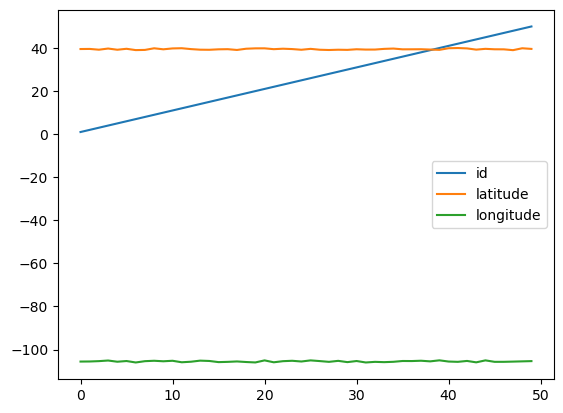

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
albatross.plot(ax = ax)
plt.show()

# Converting non-spatial data to spatial data

You can convert a pandas data frame that has columns for longitude and latitude into a spatial GeoPandas data frame by calling GeoPandas points_from_xy method as below.

In [46]:
albatross_spatial = gpd.GeoDataFrame(
    albatross, geometry=gpd.points_from_xy(albatross["longitude"], albatross["latitude"]))

In [48]:
albatross_spatial.head()

,id,latitude,longitude,geometry
0,1,39.527924,-105.575747,POINT (-105.57575 39.52792)
1,2,39.574666,-105.536514,POINT (-105.53651 39.57467)
2,3,39.217363,-105.374948,POINT (-105.37495 39.21736)
3,4,39.755457,-105.091596,POINT (-105.09160 39.75546)
4,5,39.197807,-105.649858,POINT (-105.64986 39.19781)


In [49]:
geometry = gpd.points_from_xy(albatross["longitude"], albatross["latitude"])

albatross_spatial = gpd.GeoDataFrame(albatross, geometry = geometry)

albatross_spatial.head()

,id,latitude,longitude,geometry
0,1,39.527924,-105.575747,POINT (-105.57575 39.52792)
1,2,39.574666,-105.536514,POINT (-105.53651 39.57467)
2,3,39.217363,-105.374948,POINT (-105.37495 39.21736)
3,4,39.755457,-105.091596,POINT (-105.09160 39.75546)
4,5,39.197807,-105.649858,POINT (-105.64986 39.19781)


If you have a pandas data frame with geometry in wkt format, you can also convert that to a geopandas data frame.  Instructions can be found in the [GeoPandas documentation](https://geopandas.org/gallery/create_geopandas_from_pandas.html)

## Reading tabular data from an HTML page

Pandas can also read an HTML table from a website into a pandas data frame which can be incredibly useful.

Before using this you need to install a few libraries.

We can actually do this from within jupyter notebooks

In [50]:
!pip install lxml html5lib BeautifulSoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.6 MB/s eta 0:00:00a 0:00:01


Once this is done there are a few more lines of code that are necessary to allow you to read tables from web pages over secure (https) connections.

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Once this is done you simply need to provide a web page.

**NOTE:** The return value is a python list of pandas dataframes.  One dataframe for each table in the specified web page.

In [51]:
gdp_list = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")

In [53]:
gdp_list[4].head()

,Rank,Country/Territory,Type
0,1,Qatar,Oil & Gas
1,2,Luxembourg,Top 10 Tax haven (Sink OFC)
2,—,Macau,Tax haven (Sink OFC)
3,3,Singapore,Top 10 Tax haven (Conduit OFC)
4,4,Brunei,Oil & Gas


Also note that this will not work on all web pages. In my experience web pages that generate tables dynamically rather than static web pages are especially problematic.

# Many other formats

In [ ]:
pd.read_

In [57]:
help(pd.read_html)

Help on function read_html in module pandas.io.html:

read_html(io: 'FilePath | ReadBuffer[str]', *, match: 'str | Pattern' = '.+', flavor: 'HTMLFlavors | Sequence[HTMLFlavors] | None' = None, header: 'int | Sequence[int] | None' = None, index_col: 'int | Sequence[int] | None' = None, skiprows: 'int | Sequence[int] | slice | None' = None, attrs: 'dict[str, str] | None' = None, parse_dates: 'bool' = False, thousands: 'str | None' = ',', encoding: 'str | None' = None, decimal: 'str' = '.', converters: 'dict | None' = None, na_values: 'Iterable[object] | None' = None, keep_default_na: 'bool' = True, displayed_only: 'bool' = True, extract_links: "Literal[None, 'header', 'footer', 'body', 'all']" = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>, storage_options: 'StorageOptions' = None) -> 'list[DataFrame]'
    Read HTML tables into a ``list`` of ``DataFrame`` objects.
    
    Parameters
    ----------
    io : str, path object, or file-like object
        String, path 